# Hito 1
#### Minería de Datos CC5205-1
### Proyecto: Impacto del uso de herramientas de estudio y espacios pedagógicos al desempeño en la prueba PAES.
#### Grupo 3
#### Integrantes: Martín Avendaño, Javier Contreras, Antonia Del Castillo, Matías Miranda, Gabriela Urbina.


## Introducción: Problema y motivación.

El análisis inicial de datos se centró en investigar el impacto de la necesidad de los espacios pedagógicos, tales como laboratorios, bibliotecas y salas de computadoras, en el desempeño de los estudiantes en las pruebas de selección para la educación superior. El interés en esta área de estudio surgió de las experiencias individuales de los estudiantes previas a su ingreso a la universidad. Al comenzar esta nueva etapa académica, los estudiantes tienen mayor acceso y  cantidad de áreas de estudio, en comparación con la etapa escolar, afectando positivamente en su desempeño universitario.

A partir de esa experiencia, el grupo de investigación se propuso determinar si el acceso a estos entornos se correlaciona con un mayor rendimiento académico. El objetivo es discernir si esta percepción es subjetiva por parte de los estudiantes o si existe una relación empírica cuantificable entre el entorno de estudio y el desempeño académico evaluado.

Se eligió un DataSet de la plataforma Datos Públicos del Ministerio de Educación, más específicamente, del Centro de Estudios Mineduc (CEM), que reúne datos sobre la rendición de la prueba de acceso a la educación superior (PAES) en el año 2023. De aquí se seleccionaron dos archivos con información sobre los resultados de los inscritos para la prueba, uno con detalles sobre puntajes por prueba, y otro con atributos correspondientes a la caracterización socioeconómica de los inscritos.

## Exploración de datos.

En la tabla “Inscritos Puntajes” se encuentran datos relevantes que serán de importancia mencionar, incluyendo el rol base de datos del establecimiento al cual pertenece el estudiante. Además, se registran el código de enseñanza que describe la naturaleza del establecimiento, el nombre oficial de la unidad educativa, y su modalidad educacional. También se incluye el grupo dependencia, que especifica si el establecimiento es particular, municipal, entre otros. Otros datos importantes incluyen el promedio de notas, puntaje NEM (Notas de Enseñanza Media), el ranking del estudiante y los resultados de cada prueba de selección rendida. Estos resultados se detallan con la distribución de respuestas entre correctas, erradas y omitidas.

La tabla “Socioeconómicos”, proporciona una variedad de datos que son cruciales para comprender el contexto y las condiciones de vida de los estudiantes. Entre los aspectos relevantes se incluyen la identificación del estudiante a través del MRUN, datos demográficos como el sexo y la fecha de nacimiento, así como información sobre la ocupación y el estado laboral del estudiante. Además, se detalla la estructura familiar del estudiante, incluyendo quién es el jefe de familia, la actividad laboral principal del jefe de familia y el ingreso per cápita del hogar. Esta tabla también ofrece información sobre la educación de los padres, la participación en instituciones de educación superior y detalles sobre la carrera y la titulación cursada por el estudiante. Estos datos socioeconómicos son fundamentales para explorar las posibles relaciones entre el entorno familiar y el rendimiento académico, así como para identificar posibles factores de influencia en los resultados de las pruebas de selección para la educación superior. Asimismo, entrega información sobre las condiciones del establecimiento educacional, las áreas a las que pueden acceder los estudiantes, y a qué dispositivos tienen acceso.

Para estudiar los datos, se utilizaron ambos datasets, realizando un merge entre ambas tablas. Durante el proceso de limpieza de los datos, la mayoría ya tenía un formato adecuado para su análisis. Sin embargo, se ajustaron ciertas columnas para poder realizar operaciones matemáticas sobre ellas. Además, se optó por excluir aquellos datos que no entregaban información relevante para el estudio, como aquellas etiquetadas como ‘prefiero no responder’, generando una coherencia de los datos utilizados en el análisis.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

inscritos = pd.read_table('../A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv', sep=';', low_memory=False)
socioeconomico = pd.read_table('../B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv', sep=';')

inscritos = inscritos.drop(columns=['RBD'])
columnas_duplicadas = set(inscritos.columns).intersection(socioeconomico.columns)
columnas_duplicadas.remove('MRUN')
inscritos = inscritos.drop(columns=columnas_duplicadas)

df = socioeconomico.merge(inscritos, on='MRUN')

df.shape


(296812, 152)

In [14]:
df['PROMEDIO_CM_MAX'] = df['PROMEDIO_CM_MAX'].str.replace(',', '.')
df['PROMEDIO_CM_MAX'] = pd.to_numeric(df['PROMEDIO_CM_MAX'], errors='coerce')
df['ANYO_PROCESO'] = pd.to_numeric(df['ANYO_PROCESO'], errors='coerce')
df['ANYO_DE_EGRESO'] = pd.to_numeric(df['ANYO_DE_EGRESO'], errors='coerce')

for i in range(1,10):
    df['ESPACIO_'+str(i)] = df['ESPACIO_'+str(i)].str.replace('N', '0').str.replace('S', '1').astype(float).astype(int)

for i in range(1,4):
    df['DISPOSITIVO_'+str(i)] = df['DISPOSITIVO_'+str(i)].str.replace('N', '0').str.replace('S', '1').astype(float).astype(int)

df = df[df['CONEXION_INSUFICIENTE'] != 9]

In [15]:
a=df.iloc[:, :1].head()
b=df.iloc[:, 20:24].head()
c=df.iloc[:, 29:33].head()
d=df.iloc[:, 53:57].head()

muestra= pd.concat([a, b, c, d], axis=1)
muestra

MRUN  ESPACIO_1  ESPACIO_2  ESPACIO_3  ESPACIO_4  USO_ESPACIO_1  \
0   3703667          0          0          0          0              0   
4  22654139          0          0          0          0              0   
6  13700650          1          1          0          0              1   
7  14080890          1          1          1          0              2   
8     31075          1          1          1          0              1   

   USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4 PROMEDIO_NOTAS  PTJE_NEM  \
0              0              0              0           5,15       463   
4              0              0              0            6,4       830   
6              3              0              0           5,47       569   
7              4              2              0           5,23       493   
8              4              1              0           6,27       793   

   PORC_SUP_NOTAS  PTJE_RANKING  
0              80           546  
4              10           875  
6              50           569  
7              10           501  
8              10           859

Los datos fueron sometidos a una variedad de análisis descriptivos y se crearon visualizaciones gráficas con el fin de profundizar en su comprensión y extraer conocimientos valiosos. Es esencial emplear diversos enfoques analíticos para obtener una visión completa y precisa de los datos en estudio. No solo se trata de generar múltiples visualizaciones para atributos específicos, sino también de considerar la importancia relativa de cada atributo en función de cómo se presenta en las visualizaciones, lo cual influye en la construcción de modelos futuros.

Los métodos de exploración de datos que se utilizaron fueron los siguientes:

Estadísticas de resumen: con el objetivo de familiarizarnos con los datos y comprender su distribución, se pueden realizar análisis descriptivos de la información que nos entrega, calculando promedios, medianas, desviaciones estándar, máximos y mínimos de los puntajes, por ejemplo. Con esto, se obtendría una visión general del perfil de los estudiantes y su rendimiento académico.

Exploración de relaciones: se puede verificar la relación entre variables como el promedio de notas y la accesibilidad a tecnologías, el puntaje en las pruebas y el uso de espacios pedagógicos del establecimiento, mediante su correlación. Esto ayudará en el estudio de los posibles factores que inciden en el rendimiento académico de los estudiantes.

Visualización de datos: a través de gráficos como los histogramas, diagramas de dispersión y diagramas de caja se puede visualizar la distribución de las variables, detectando outliers y patrones dentro de los datos.

In [16]:
muestra.describe()

MRUN  ESPACIO_1  ESPACIO_2  ESPACIO_3  ESPACIO_4  \
count  5.000000e+00   5.000000   5.000000   5.000000        5.0   
mean   1.083408e+07   0.600000   0.600000   0.400000        0.0   
std    9.028019e+06   0.547723   0.547723   0.547723        0.0   
min    3.107500e+04   0.000000   0.000000   0.000000        0.0   
25%    3.703667e+06   0.000000   0.000000   0.000000        0.0   
50%    1.370065e+07   1.000000   1.000000   0.000000        0.0   
75%    1.408089e+07   1.000000   1.000000   1.000000        0.0   
max    2.265414e+07   1.000000   1.000000   1.000000        0.0   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4    PTJE_NEM  \
count        5.00000        5.00000       5.000000            5.0    5.000000   
mean         0.80000        2.20000       0.600000            0.0  629.600000   
std          0.83666        2.04939       0.894427            0.0  170.987719   
min          0.00000        0.00000       0.000000            0.0  463.000000   
25%          0.00000        0.00000       0.000000            0.0  493.000000   
50%          1.00000        3.00000       0.000000            0.0  569.000000   
75%          1.00000        4.00000       1.000000            0.0  793.000000   
max          2.00000        4.00000       2.000000            0.0  830.000000   

       PORC_SUP_NOTAS  PTJE_RANKING  
count        5.000000      5.000000  
mean        32.000000    670.000000  
std         31.937439    181.579184  
min         10.000000    501.000000  
25%         10.000000    546.000000  
50%         10.000000    569.000000  
75%         50.000000    859.000000  
max         80.000000    875.000000

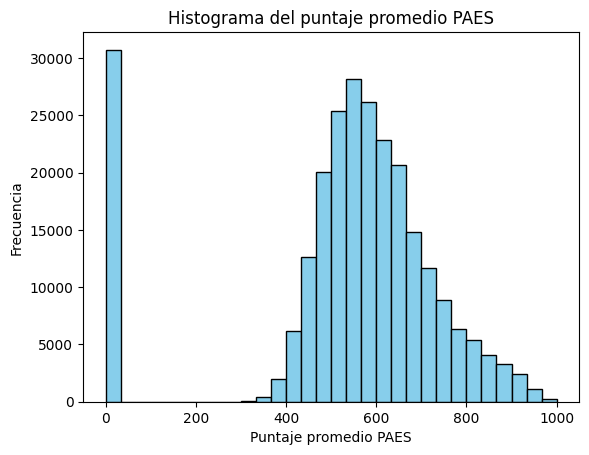

In [17]:
plt.hist(df['PROMEDIO_CM_MAX'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Puntaje promedio PAES')
plt.ylabel('Frecuencia')
plt.title('Histograma del puntaje promedio PAES')
plt.show()

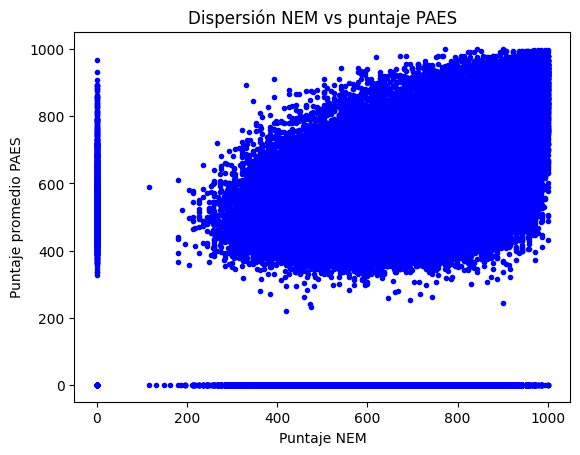

In [18]:
plt.scatter(df['PTJE_NEM'], df['PROMEDIO_CM_MAX'], color='BLUE', marker='.')

plt.xlabel('Puntaje NEM')
plt.ylabel('Puntaje promedio PAES')
plt.title('Dispersión NEM vs puntaje PAES')
plt.show()

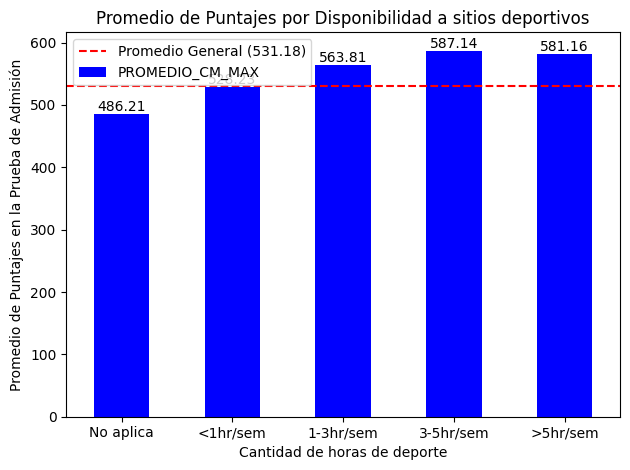

In [19]:
estudio_3 = df[['USO_ESPACIO_7','PROMEDIO_CM_MAX']]
promedio_por_deporte = estudio_3.groupby('USO_ESPACIO_7')['PROMEDIO_CM_MAX'].mean()
ax = promedio_por_deporte.plot(kind='bar', color=['blue'])

# Agregar etiquetas en las barras
for i, v in enumerate(promedio_por_deporte):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')


# Cambiar los nombres de las categorías en el eje x
plt.xticks(range(len(promedio_por_deporte.index)), ['No aplica', '<1hr/sem', '1-3hr/sem', '3-5hr/sem', '>5hr/sem'], rotation=0)

# Agregar una línea de referencia para el promedio general de puntajes
promedio_general = estudio_3['PROMEDIO_CM_MAX'].mean()
plt.axhline(y=promedio_general, color='red', linestyle='--', label=f'Promedio General ({promedio_general:.2f})')

plt.title('Promedio de Puntajes por Disponibilidad a sitios deportivos')
plt.xlabel('Cantidad de horas de deporte')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.legend()
plt.tight_layout()
plt.show()

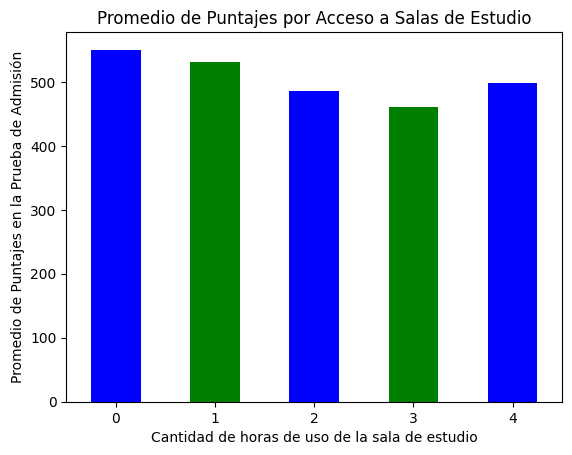

In [20]:
estudios = df[['USO_ESPACIO_2','PROMEDIO_CM_MAX']]
promedio_por_biblioteca = estudios.groupby('USO_ESPACIO_2')['PROMEDIO_CM_MAX'].mean()
promedio_por_biblioteca
promedio_por_biblioteca.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por Acceso a Salas de Estudio')
plt.xlabel('Cantidad de horas de uso de la sala de estudio')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

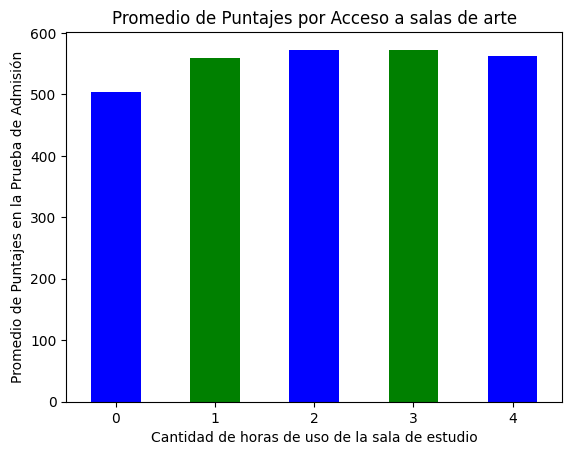

In [21]:
estudios = df[['USO_ESPACIO_4','PROMEDIO_CM_MAX']]
promedio_por_biblioteca = estudios.groupby('USO_ESPACIO_4')['PROMEDIO_CM_MAX'].mean()
promedio_por_biblioteca
promedio_por_biblioteca.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por Acceso a salas de arte')
plt.xlabel('Cantidad de horas de uso de la sala de estudio')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

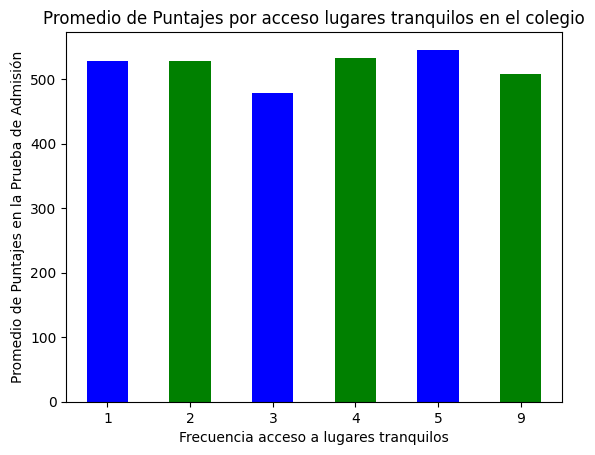

In [22]:
promedio_por_tranquilidad = df.groupby('TRANQUILIDAD_COLEGIO')['PROMEDIO_CM_MAX'].mean()
promedio_por_tranquilidad.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por acceso lugares tranquilos en el colegio')
plt.xlabel('Frecuencia acceso a lugares tranquilos')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

Inicialmente, para analizar si hay correlación entre los datos, se crearon gráficos de barras, donde se buscó una tendencia en cuanto a la relación entre los puntajes de las pruebas y el uso de diferentes espacios (en horas) de los establecimientos educacionales, como laboratorios, espacios deportivos y salas de estudio. Además, se llevó a cabo un estudio sobre los colegios municipales, para ver si existían diferencias con el caso global.

También se realizaron gráficos de caja, para explorar la relación entre el promedio de las pruebas y los índices socioeconómicos, específicamente en relación al ingreso per cápita del grupo familiar. Esto permitió visualizar los cuartiles e identificar una correlación entre ambas variables.

In [23]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'notebook'

distribution = df[(df['PROMEDIO_CM_MAX'] != 0) & (df['INGRESO_PERCAPITA_GRUPO_FA'] != 99)]
fig = px.box(distribution, x='INGRESO_PERCAPITA_GRUPO_FA', y='PROMEDIO_CM_MAX')
fig.show()

## Preguntas y problemas.

Con los indicios de las débiles relaciones vistas en los gráficos que se usaron en un principio para visualizar las distribuciones de los datos con respecto al promedio del puntaje obtenido por los alumnos, se calculó una matriz de correlación para comparar la correlación de Pearson, principalmente entre las variables relacionadas con el uso de los espacios pedagógicos por parte de los alumnos con el puntaje promedio obtenido en la prueba de selección PAES. La matriz de correlación fue graficada en un mapa de calor generado con la biblioteca seaborn, y permitió identificar ligeras correlaciones entre algunas de las variables en estudio, previamente discretizadas, pero que no revelan una relación lineal directa con la distribución de los promedios de los puntajes de los alumnos. Estos valores para la correlación con el puntaje promedio son menores en magnitud al 0.3, siendo los más significativos dentro del grupo de variables de uso de los espacios del establecimiento educativo la infraestructura deportiva y los laboratorios de ciencias.

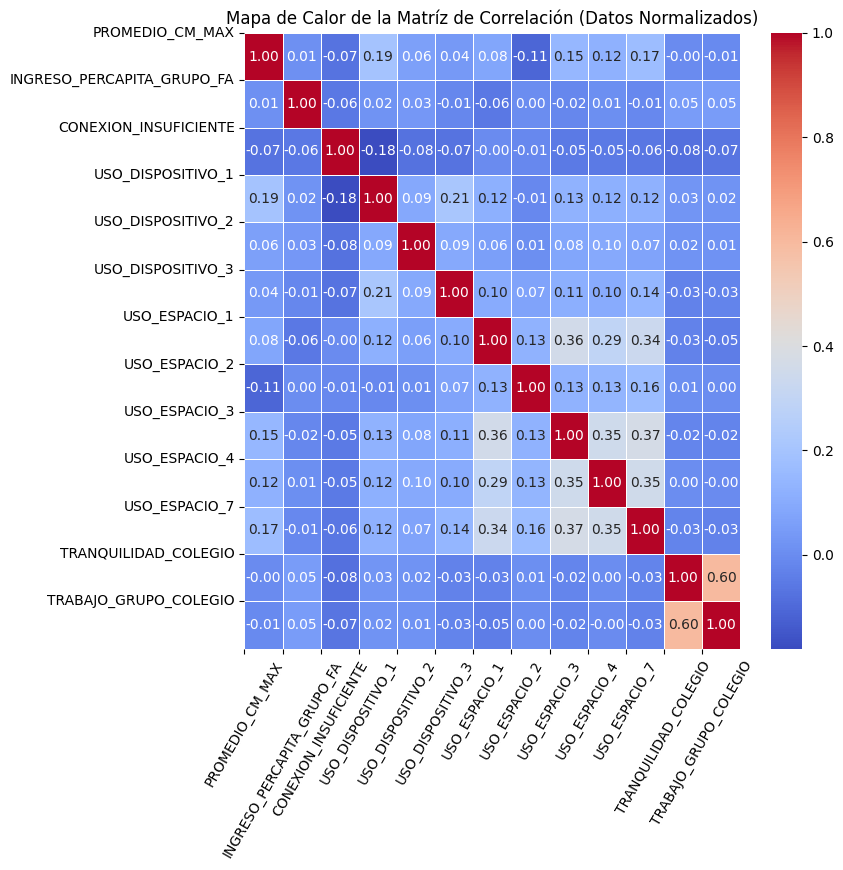

In [24]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

dfcorr = df[['PROMEDIO_CM_MAX', 'INGRESO_PERCAPITA_GRUPO_FA', 'CONEXION_INSUFICIENTE', 'USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 'USO_ESPACIO_7', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']]

scaler = StandardScaler()
df_normalizado = scaler.fit_transform(dfcorr)
df_normalizado = pd.DataFrame(df_normalizado)

plt.figure(figsize=(8,8))
corr = df_normalizado.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.xticks(range(len(dfcorr.columns)), dfcorr.columns, rotation=60)
plt.yticks(range(len(dfcorr.columns)), dfcorr.columns, rotation=0)
plt.title('Mapa de Calor de la Matríz de Correlación (Datos Normalizados)')
plt.show()

En base a estas variables, se tiene que la relación lineal de los datos con el puntaje promedio no es muy directa, lo que complicaría el desarrollo de un modelo predictivo en base al puntaje promedio, que era una de las alternativas que se barajaban. Aunque podría suceder que al agregar las variables dentro de un modelo predictivo, se logre un mejor desempeño. A partir de esto, si bien la no correlación no indica mala predictibilidad, se llegó a la conclusión que este estudio carecería de un valor social significativo, ya que predecir el puntaje según los atributos económicos no entrega información que responda la pregunta original.

Por otro lado, un diferente enfoque que se le puede dar al proyecto puede ser en torno a clustering sobre estos datos, y ver qué cosas tienen en común los estudiantes con puntajes similares, por ejemplo, acceso a internet, bibliotecas, uso de computadores. Y así surge la pregunta:
¿Existirán grupos (clusters) de alumnos, que tengan similitudes según su puntaje obtenido?

Este problema, además de requerir un análisis profundo, y por ello, un entrenamiento de modelos extensivo, posee más versatilidad en cuanto al desarrollo de la propia problemática, puesto que se dependerá de ciertos atributos variados no estrictamente estáticos, dando dinamismo al cómo abordar este problema.

También, se puede revisar casos más específicos, cómo el comportamiento de los inscritos según su principal motivación para dar la prueba, dado que existen casos particulares como quienes dan la prueba porque lo obligaron a inscribirse en el colegio, o son profesionales de la educación y desean conocer el instrumento, o porque no pudieron rendir alguna aplicación pasada. Esto, se intuye que puede mostrar cambios en la forma en que estas personas usan las herramientas de estudio o los espacios pedagógicos para prepararse para la rendición de la prueba PAES. 

Otra componente que se pretende estudiar es la influencia de factores más directamente relacionados con la caracterización socioeconómica de los inscritos para dar la prueba, como por ejemplo el tipo de financiamiento de la institución (municipal, particular subvencionado, particular, etc.) o el ingreso per cápita del grupo familiar al que se pertenece.

## Aportes de cada integrante:

Entre todos se cargó el dataset y se discutió el análisis a realizar.
- Martín Avendaño : Estuvo a cargo de la formulación de posibles preguntas que necesitaran utilizar la minería de datos para ser respondidas y participó en la exploración de los datos, buscando posibles relaciones entre atributos de las tablas.
- Antonia Del Castillo : Participó en la redacción de las secciones de Introducción y Exploración de Datos. Estuvo a cargo del estudio de la documentación de los datasets utilizados y los posibles usos que sus datos puedan brindar al proyecto. Además, estuvo trabajando activamente en la revisión de la presentación, para que estuviera de acuerdo a los requerimientos del equipo docente.
- Javier Contreras : Participó en la discusión del enfoque del proyecto en cuanto a la pregunta final a realizar (y el cambió que surgió en esta), estuvo a cargo de la escritura de la introducción y participó en la redacción de la sección de exploración de datos del informe, aportando a sí mismo a la exploración de estos y las técnicas a utilizar.
- Matías Miranda : Estuvo a cargo de hacer el gráfico de calor de la matriz de correlación, participó en la limpieza y conversión de datos, además de en la redacción del Análisis Exploratorio de datos y Preguntas y Problemas en el informe y presentó la parte del análisis exploratorio de datos.
- Gabriela Urbina : Estuvo a cargo de hacer el estudio y análisis de los gráficos de barras y de caja, participó de la limpieza de datos, además de la redacción del Análisis Exploratorio de Datos y creó los slides de la presentación.
